# Prob 2(b)
# Cell Centre

In [62]:
#%matplotlib inline
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg
import timeit

Populating the interactive namespace from numpy and matplotlib


In [48]:
%%bash 
make Prob2cell
mpirun -n 4 ./Prob2cell -m 7 -kmax 100000 -tol 1.00e-10 --loglevel debug > Prob2cell.csv

mpicc -o Prob2cell  -I/home/ruthvik/Desktop/Spring18/ME471-571/src -I/usr/include Prob2cell.c /home/ruthvik/Desktop/Spring18/ME471-571/src/demo_util.c -lm


iterations: 25217
residual: 9.99519e-11
cells: 128
error: 0.000301183


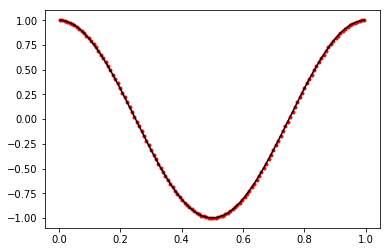

In [49]:
Us = np.genfromtxt('Prob2cell.csv', delimiter=',')
print("iterations: %d" % Us[-1])
print("residual: %g" % Us[-2])
Us = Us[:-2]
cells = len(Us)
h = 1/cells
print("cells: %d" % len(Us))
x = np.linspace(h/2,1-h/2,cells)
print("error: %g" % np.max(np.abs(Us - np.cos(2*np.pi*x))))
plt.plot(x,Us,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'k-')

# Node Centre

In [60]:
%%bash 
make Prob2node
mpirun -n 4 ./Prob2node -m 7 -kmax 100000 -tol 1.00e-10 --loglevel debug > Prob2node.csv

make: 'Prob2node' is up to date.


iterations: 24573
residual: 9.99814e-11
cells: 129
error: 0.000401477


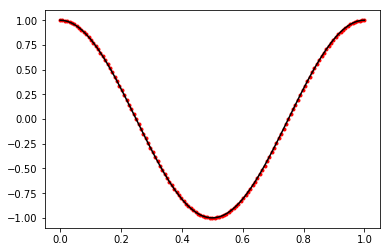

In [61]:
Us = np.genfromtxt('Prob2node.csv', delimiter=',')
print("iterations: %d" % Us[-1])
print("residual: %g" % Us[-2])
Us = Us[:-2]
cells = len(Us)
h = 1/cells
print("cells: %d" % len(Us))
x = np.linspace(0,1,cells)
print("error: %g" % np.max(np.abs(Us - np.cos(2*np.pi*x))))
plt.plot(x,Us,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'k-')

# Problem 2(c)
# Cell Center

In [63]:
for pv in range(5,11):
    N=2**pv
    file = open("Gauss_Cell_results_"+str(N)+".csv", "w")
    tr = %timeit -n 1 -r 1 -o w = p = subprocess.run(['/usr/bin/mpirun','-n', str(4),\
    './Prob2cell','-m',str(pv),"-kmax",str(10000000),"-tol",str(1.00e-10),"--loglevel", "debug"], stdout=file)
    file.close()

173 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
73.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
292 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.16 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.84 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
36.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [64]:
err=[]
for pv in range(5,11):
    N=2**pv
    Us = np.genfromtxt("Gauss_Cell_results_"+str(N)+".csv", delimiter=',')
    Us = Us[:-2]
    cells = len(Us)
    h = 1/cells
    x = np.linspace(h/2,1-h/2,cells)
    error = np.max(np.abs(Us - np.cos(2*np.pi*x)))
    err.append(error)
    print(error)

0.004815273895530492
0.0012045448709456785
0.0003011833974236877
7.530229180818804e-05
1.889617296435553e-05
9.23591507639987e-06


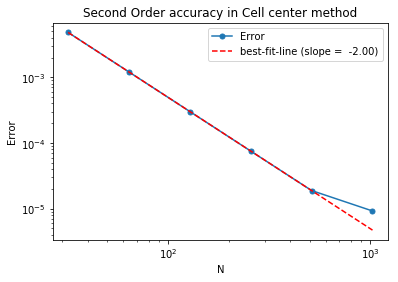

In [66]:
Nvec =[2**i for i in range(5,11)] 
loglog(Nvec,err,'.-',markersize=10)
xlabel('N')
ylabel('Error')
title('Second Order accuracy in Cell center method');

c = polyfit(log(Nvec[:-1]),log(err[:-1]),1)
loglog(Nvec,exp(polyval(c,log(Nvec))),'r--')
legend(["Error","best-fit-line (slope = {:6.2f})".format(c[0])])

# Problem 2(c)
# Node Center

In [67]:
for pv in range(5,11):
    N=2**pv
    file = open("Gauss_Node_results_"+str(N)+".csv", "w")
    tr = %timeit -n 1 -r 1 -o w = p = subprocess.run(['/usr/bin/mpirun','-n', str(4),\
    './Prob2node','-m',str(pv),"-kmax",str(10000000),"-tol",str(1.00e-10),"--loglevel", "debug"], stdout=file)
    file.close()

132 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
82.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
280 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.43 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.88 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
33.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [68]:
err=[]
for pv in range(5,11):
    N=2**pv
    Us = np.genfromtxt("Gauss_Node_results_"+str(N)+".csv", delimiter=',')
    Us = Us[:-2]
    cells = len(Us)
    h = 1/cells
    x = np.linspace(0,1,cells)
    error = np.max(np.abs(Us - np.cos(2*np.pi*x)))
    err.append(error)
    print(error)

0.00643791841689878
0.0016071136514419493
0.00040147706181326015
9.97366593358251e-05
2.2441315261190198e-05
4.5043445270342986e-06


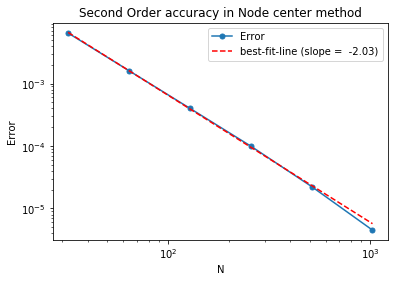

In [69]:
Nvec =[2**i for i in range(5,11)] 
loglog(Nvec,err,'.-',markersize=10)
xlabel('N')
ylabel('Error')
title('Second Order accuracy in Node center method');

c = polyfit(log(Nvec[:-1]),log(err[:-1]),1)
loglog(Nvec,exp(polyval(c,log(Nvec))),'r--')
legend(["Error","best-fit-line (slope = {:6.2f})".format(c[0])])